In [1]:
import igraph as ig
import numpy as np
import random
from tqdm import tqdm
from message_passing_simulation_v2_small_world_in_smallworld import SmallWorldSimulation

In [2]:
num_nodes_city = 169
num_city = 2
k_nearest = 10
rewiring_prob = 0.1
p_vanish = 0.1



simulation = SmallWorldSimulation(num_nodes_city, num_city, k_nearest, rewiring_prob, p_vanish)

num_trials = 200
step_list = []
for _ in tqdm(range(num_trials)):
#     simulation = SmallWorldSimulation(num_nodes_city, num_city, k_nearest, rewiring_prob, p_vanish)
    steps = simulation.simulate()
    step_list.append(steps)

success_list = [x for x in step_list if x > 0]
print("mean steps: ", np.average(success_list))
print("success rate: ", len(success_list) / len(step_list))

100%|██████████████████████████████| 200/200 [00:00<00:00, 1374.44it/s]

mean steps:  12.058823529411764
success rate:  0.17


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

g = simulation.graph
positions = simulation.locations

G_nx = nx.Graph(g.get_edgelist())

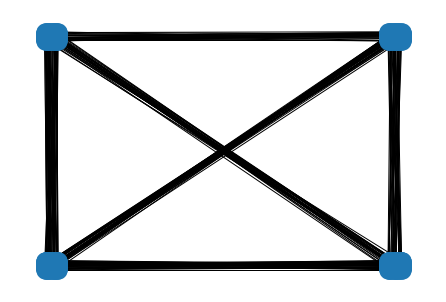

In [4]:
nx.draw(G_nx, pos=positions, with_labels=False)
plt.show()

In [24]:
def is_small_world(G):
    avg_path_length = nx.average_shortest_path_length(G)
    clustering_coefficient = nx.average_clustering(G)

    print(f"Average shortest path length: {avg_path_length}")
    print(f"Average clustering coefficient: {clustering_coefficient}")

    # these threshold values are just for illustration and are not standard
    if avg_path_length < 6 and clustering_coefficient > 0.5:
        return True
    else:
        return False

In [25]:
print(is_small_world(G_nx))

Average shortest path length: 3.164781432573029
Average clustering coefficient: 0.6093587661010562
True


In [29]:
a, b = create_geographical_smallworld_network(num_nodes_city, k_nearest, rewiring_prob)

In [32]:
b.ecount()

43750

In [34]:
43750 * 0.03

1312.5